# 6.6: Sourcing & Analyzing Time Series Data

In [1]:
conda install quandl


Note: you may need to restart the kernel to use updated packages.Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\banda\anaconda3

  added / updated specs:
    - quandl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.2.2           |  py311haa95532_0         162 KB
    openssl-3.0.13             |       h2bbff1b_0         7.4 MB
    quandl-3.6.1               |  py311haa95532_0          64 KB
    ------------------------------------------------------------
                                           Total:         7.7 MB

The following NEW packages will be INSTALLED:

  quandl             pkgs/main/win-64::quandl-3.6.1-py311haa95532_0 

The following packages will be UPDATED:

  certifi                        2023.11.17-py311haa95532_0 --> 2024.2.2-py311haa95532_0 
  openssl                 



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.1




In [26]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [27]:
quandl.ApiConfig.api_key = 'p5-H2czkYS-9s1AXUT9u'
data = quandl.get('FRED/MEHOINUSA672N')
data.head(5)

,Value
Date,
1984-01-01,53337.0
1985-01-01,54334.0
1986-01-01,56291.0
1987-01-01,56964.0
1988-01-01,57433.0


In [28]:
data.shape

(37, 1)

In [29]:
data.columns


Index(['Value'], dtype='object')

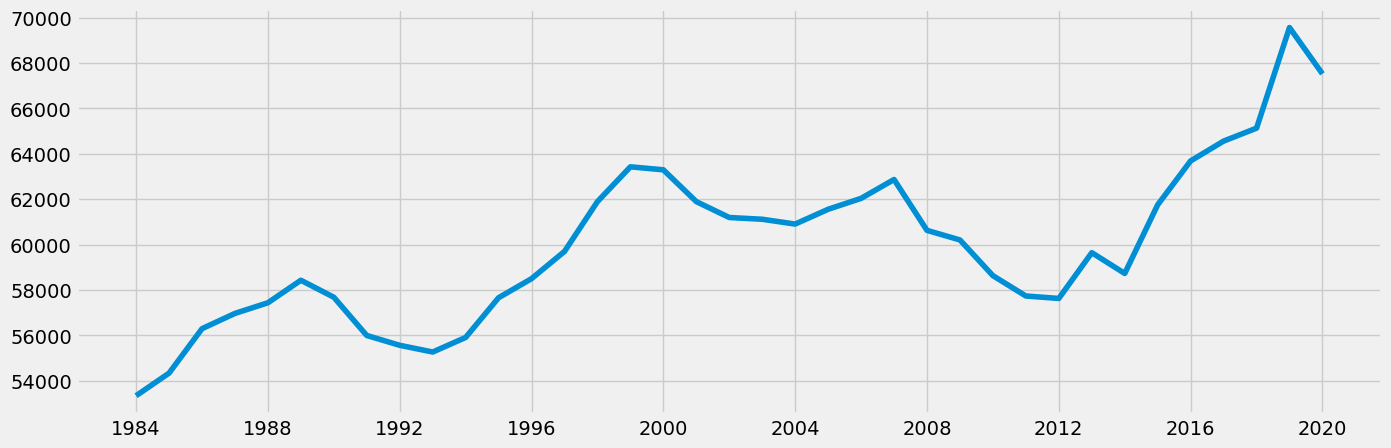

In [30]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

The data includes observations from around 1984 to 2020 of Median household income in the USA.

In [32]:
data_2 = data.reset_index()
data_2.head(5)

,Date,Value
0,1984-01-01,53337.0
1,1985-01-01,54334.0
2,1986-01-01,56291.0
3,1987-01-01,56964.0
4,1988-01-01,57433.0


In [39]:
#creatinf a subset to change the date that I wish to see in Time series
data_sub = data_2.loc[(data_2['Date'] >= '1992-01-01') & (data_2['Date'] < '2020-06-01')]

In [40]:
data_sub.head()

,Date,Value
8,1992-01-01,55559.0
9,1993-01-01,55263.0
10,1994-01-01,55905.0
11,1995-01-01,57655.0
12,1996-01-01,58494.0


In [41]:
data_sub.shape

(29, 2)

In [42]:
#reset your “Date” column as the index of the new dataframe.
from datetime import datetime
# Create a datetime column from "Date.""
data_sub['datetime'] = pd.to_datetime(data_sub['Date'])

# Set the datetime as the index of the dataframe.
data_sub = data_sub.set_index('datetime') 
# Drop the "Date" column.
data_sub.drop(['Date'], axis=1, inplace=True) 
data_sub.head()

,Value
datetime,
1992-01-01,55559.0
1993-01-01,55263.0
1994-01-01,55905.0
1995-01-01,57655.0
1996-01-01,58494.0


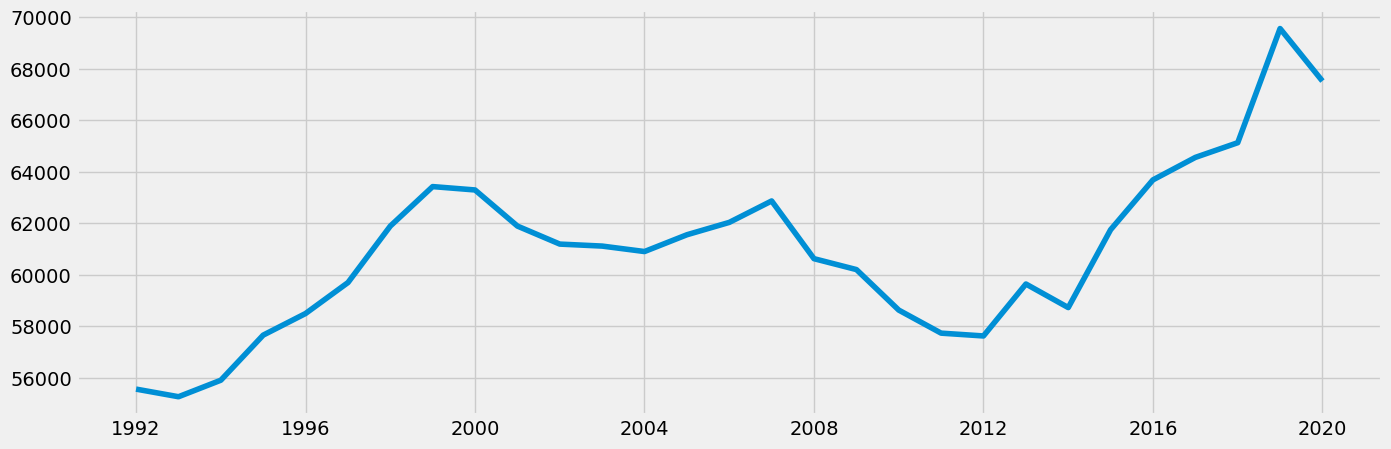

In [43]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [44]:
#checking for missing values
data_sub.isnull().sum() 

Value    0
dtype: int64

In [45]:
# checking for duplicate values result is non here
dups = data_sub.duplicated()
dups.sum()

0

Time series analysis 

In [46]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [47]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

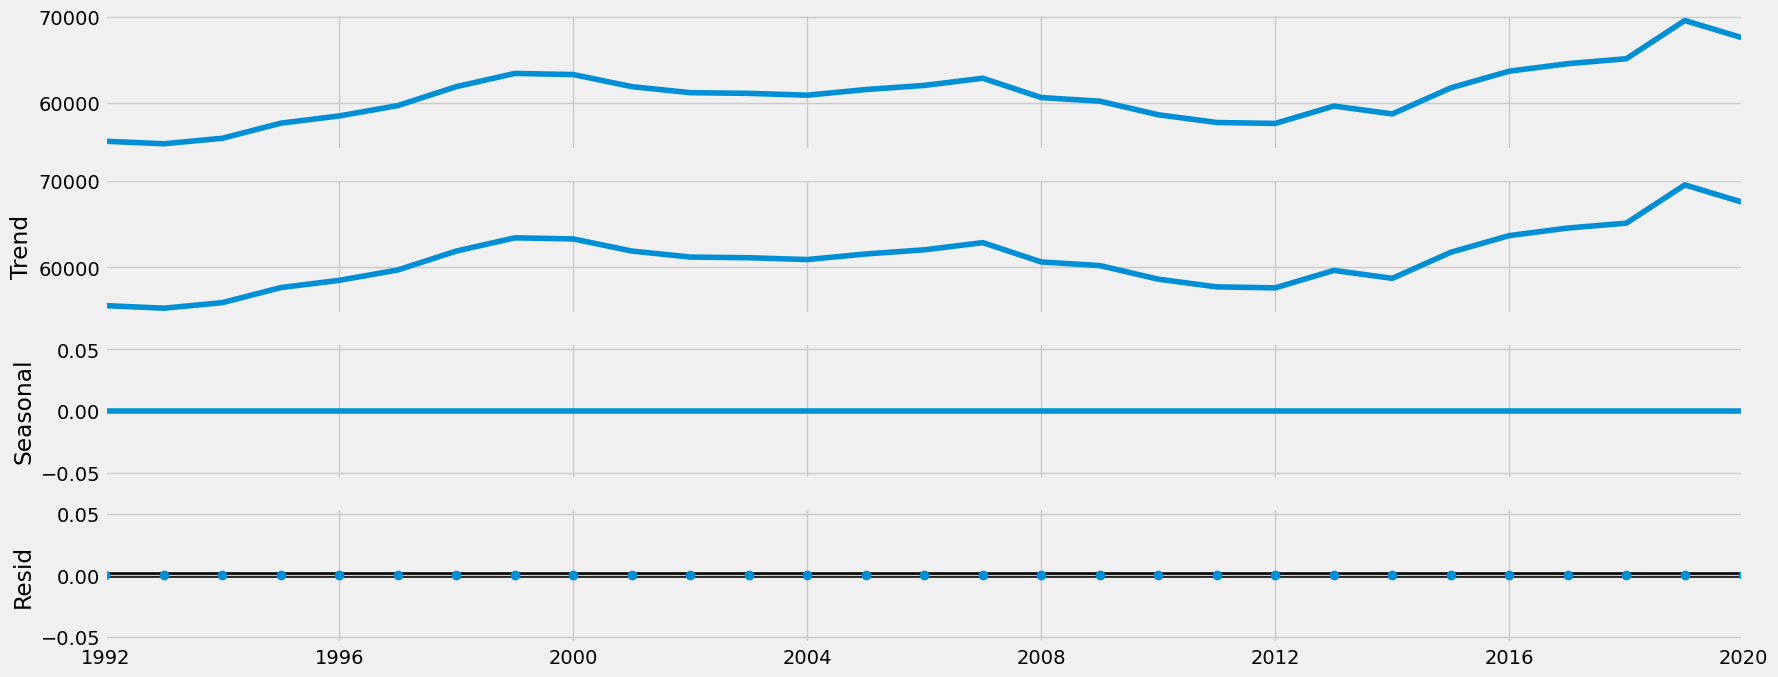

In [48]:
# Plot the separate components

decomposition.plot()
plt.show()

Obervation: you can see that the trend is that the income decrease after econimic crisis in 2008, that loowest in 2012 nad that increae still 2019 and once 2020 COVID hit, it decrease in over all income due to lots of unemployement.

In [49]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.112519
p-value                         0.710054
Number of Lags Used             6.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


Test statistic smaller than critical value = can reject null hypothesis
#### Test statistic larger than critical value = can’t reject null hypothesis
cretical value of 5% is -3.7 and test statistic is -1.11, 

the test statistic is less negative than the critical values at the 1%, 5%, and 10% significance levels, and the p-value is high. This suggests that we can fail to reject the null hypothesis, indicating that the time series is likely non-stationary.

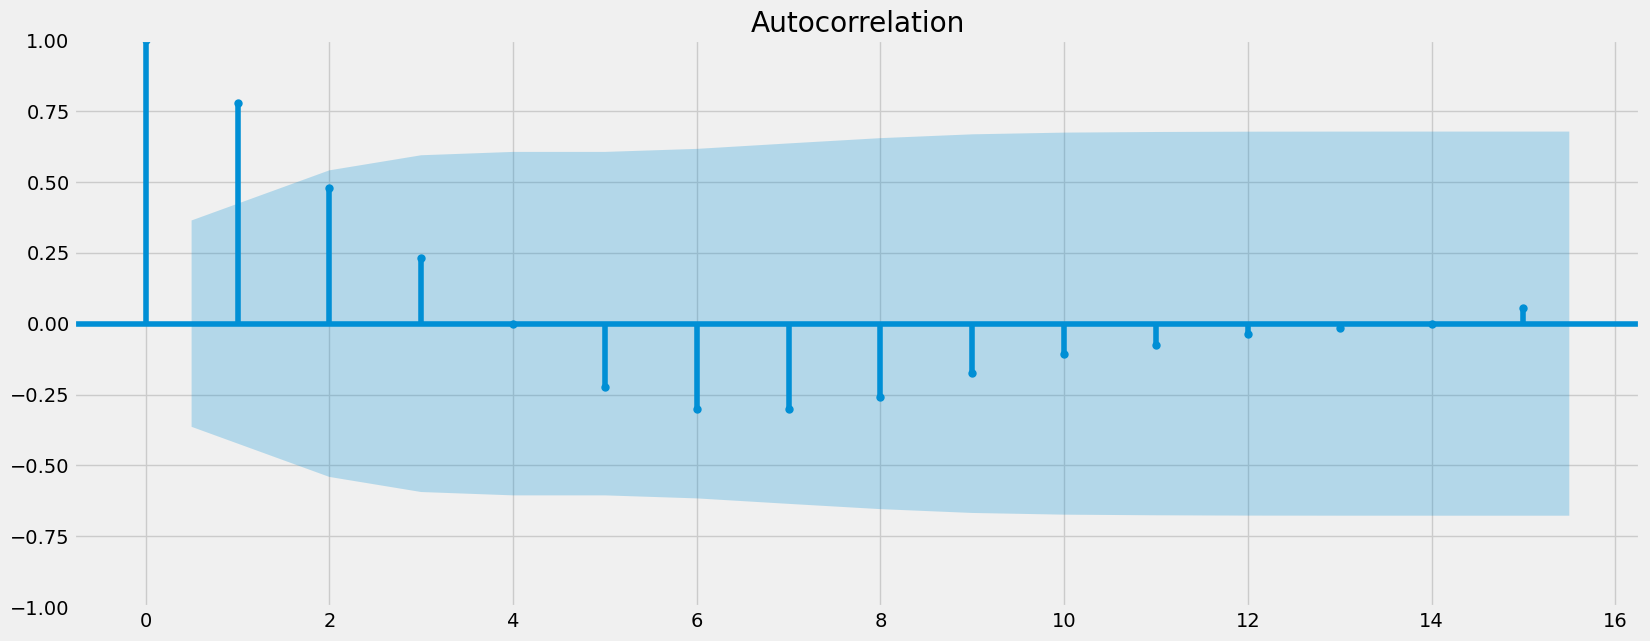

In [50]:
# Check out a plot of autocorrelations

 # Here, you import the autocorrelation and partial correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_sub)
plt.show()

Stationarizing the Federal Reserve Economic Data

In [51]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = data_sub - data_sub.shift(1)

In [53]:
data_diff.head()

,Value
datetime,
1992-01-01,NaN
1993-01-01,-296.0
1994-01-01,642.0
1995-01-01,1750.0
1996-01-01,839.0


In [54]:
# Here, you remove the missing values that came about as a result of the differencing. Nan values.
#need to remove these or you won't be able to run the Dickey-Fuller test
data_diff.dropna(inplace = True)


In [55]:
data_diff.head()

,Value
datetime,
1993-01-01,-296.0
1994-01-01,642.0
1995-01-01,1750.0
1996-01-01,839.0
1997-01-01,1203.0


In [56]:
data_diff.columns

Index(['Value'], dtype='object')

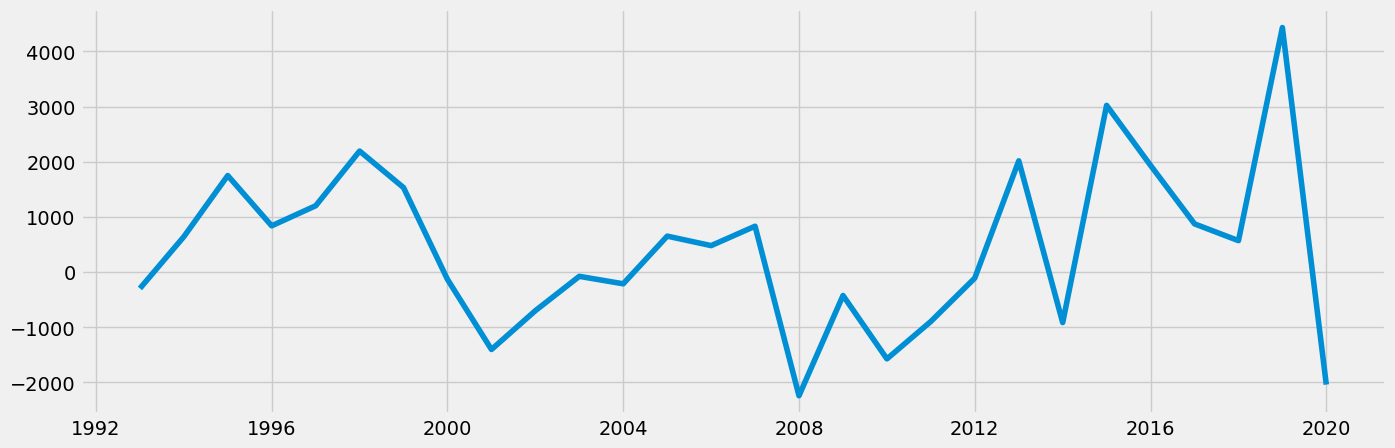

In [58]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [59]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.364092
p-value                         0.599365
Number of Lags Used             5.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


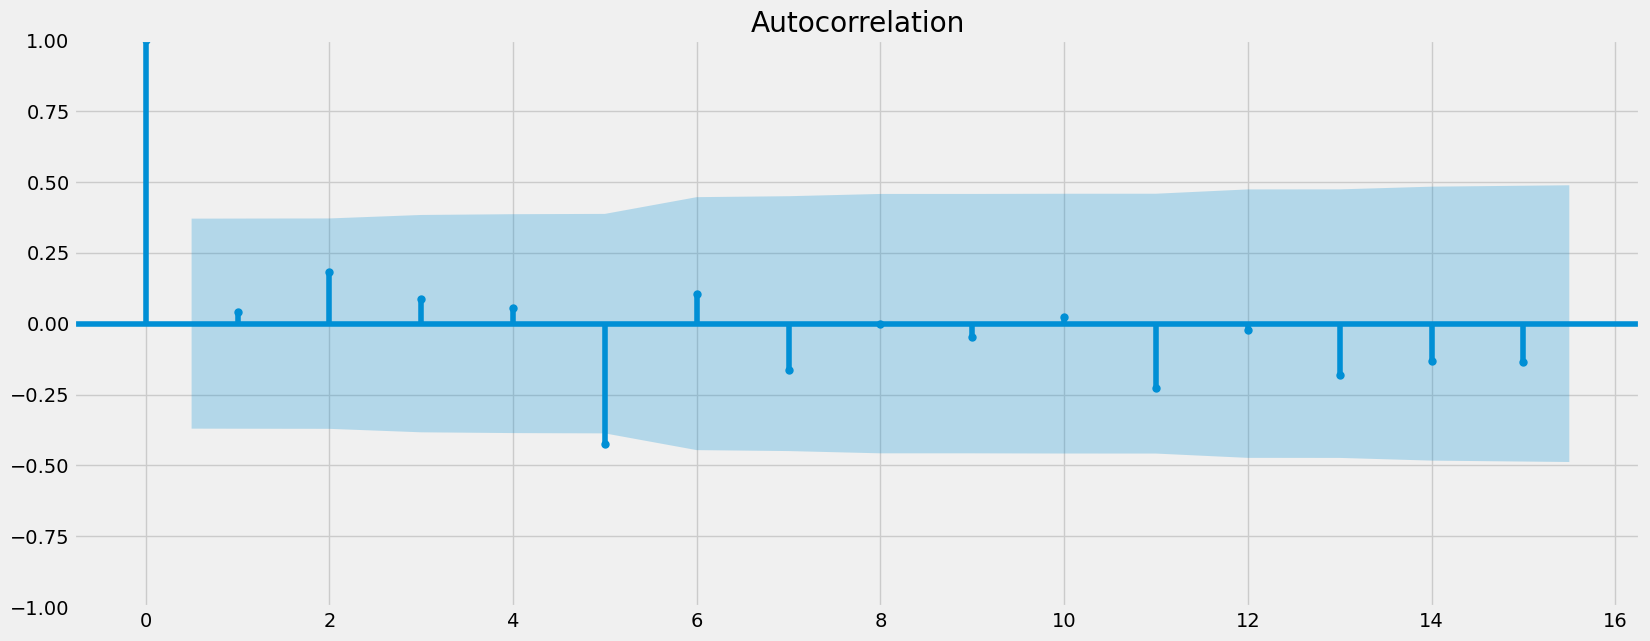

In [60]:
plot_acf(data_diff)
plt.show()

Although the autocorrelation plot has shown some improvement with fewer autocorrelated terms, it remains imperfect. This implies that, despite the Dickey-Fuller test indicating stationarity, the degree of stationarity is not very strong